<a href="https://colab.research.google.com/github/kjh8331267/AI_policy_analysis/blob/main/3_Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pickle
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/data.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
df = pd.DataFrame(data)
print(df)

Mounted at /content/drive
     Unnamed: 0   id                                              Title  \
1             1    2      AI Governance Alliance: Briefing Paper Series   
2             2    3        Using AI in Industrial Operations Guidebook   
3             3    4  COMMUNICATION FROM THE COMMISSION TO THE EUROP...   
4             4    5  Szkolenia z zakresu AI dla nauczycieli szkół p...   
5             5    6  Can democracies cooperate with China on AI res...   
..          ...  ...                                                ...   
235         235  261                    Generative AI Framework for HMG   
237         237  263           CDEI publishes research on AI governance   
239         239  265  Patient-First Health with Generative AI: Resha...   
240         240  266  Synthetic Politics: Preparing democracy for Ge...   
241         241  267  OSTP RFI on National Priorities for Artificial...   

                            Translated title   Published  \
1            

In [ ]:
data.head(5)

,Unnamed: 0,id,Title,Translated title,Published,URL,PDF URL,Source ID,Source Name,Source Country,...,Policy Document Type,Policy Document Authors,Policy Document DOIs,Top Topics,Citations,Citations (Including Same Source),Languages,download_yn,file_name,text
1,1,2,AI Governance Alliance: Briefing Paper Series,NaN,2024-01-18,https://www.weforum.org/publications/ai-govern...,https://www3.weforum.org/docs/WEF_AI_Governanc...,weforum,World Economic Forum,IGO,...,Publication,World Economic Forum,NaN,Governance ; Artificial intelligence ; Generat...,0,0,eng,N,2_AI_Governance_Alliance__Briefing_Paper_Serie...,AI Governance Alliance \nBriefing Paper Serie...
2,2,3,Using AI in Industrial Operations Guidebook,NaN,2023-10-09,https://www.weforum.org/whitepapers/harnessing...,https://www3.weforum.org/docs/WEF_Harnessing_t...,weforum,World Economic Forum,IGO,...,Publication,World Economic Forum,NaN,Artificial intelligence ; Machine learning ; C...,0,0,eng,N,3_Using_AI_in_Industrial_Operations_Guidebook.pdf,Harnessing the \nAI Revolution in \nIndustri...
3,3,4,COMMUNICATION FROM THE COMMISSION TO THE EUROP...,NaN,2024-01-25,https://webapi2016.eesc.europa.eu/v1/documents...,https://webapi2016.eesc.europa.eu/v1/documents...,eesceu,European Economic and Social Committee,EU,...,Publication,European Economic and Social Committee,NaN,European High-Performance Computing Joint Unde...,23,28,eng,Y,4_COMMUNICATION_FROM_THE_COMMISSION_TO_THE_EUR...,\nEN EN \n \n \n EUROPEAN \nCOMMISSION \...
4,4,5,Szkolenia z zakresu AI dla nauczycieli szkół p...,AI training for primary school teachers,2024-01-27,https://efs-archiwum.men.gov.pl/wp-content/upl...,https://efs-archiwum.men.gov.pl/wp-content/upl...,governmentofpoland,Government of Poland,Poland,...,Publication,Ministry of National Education,NaN,Natural language processing ; Artificial intel...,0,0,pol,Y,5_Szkolenia_z_zakresu_AI_dla_nauczycieli_szkó...,Standardy kompetencji cyfrowych nauczycieli ob...
5,5,6,Can democracies cooperate with China on AI res...,NaN,2023-01-09,https://www.brookings.edu/research/can-democra...,https://www.brookings.edu/wp-content/uploads/2...,brookings,Brookings Institution,USA,...,Publication,Matt Sheehan ; Joshua P Meltzer ; Cameron F Kerry,NaN,Artificial intelligence ; Research ; China,1,2,eng,Y,6_Can_democracies_cooperate_with_China_on_AI_r...,CAN DEMOCRACIES \nCOOPERATE WITH \nCHINA ON AI...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 1 to 241
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         191 non-null    int64 
 1   id                                 191 non-null    int64 
 2   Title                              191 non-null    object
 3   Translated title                   5 non-null      object
 4   Published                          191 non-null    object
 5   URL                                191 non-null    object
 6   PDF URL                            191 non-null    object
 7   Source ID                          191 non-null    object
 8   Source Name                        191 non-null    object
 9   Source Country                     191 non-null    object
 10  Source Type                        191 non-null    object
 11  Policy Document ID                 191 non-null    object
 12  Policy Docume

In [ ]:
data.text[2]

'Harnessing the  \nAI Revolution in  \nIndustrial Operations:  \nA Guidebook\nWHITE PAPER\nOCTOBER 2023In collaboration with\nBoston Consulting GroupImages: Getty Images© 2023 World Economic Forum. All rights \nreserved. No part of this publication may \nbe reproduced or transmitted in any form \nor by any means, including photocopying \nand recording, or by any information \nstorage and retrieval system.Disclaimer \nThis document is published by the  \nWorld Economic Forum as a contribution \nto a project, insight area or interaction. \nThe findings, interpretations and \nconclusions expressed herein are a result \nof a collaborative process facilitated and \nendorsed by the World Economic Forum \nbut whose results do not necessarily \nrepresent the views of the World Economic \nForum, nor the entirety of its Members, \nPartners or other stakeholders.Contents\nHarnessing the AI Revolution in Industrial Operations: A Guidebook\n2Foreword  3\nExecutive summary 4\n1. AI’s potential in in

In [ ]:
!pip install geotext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.6 MB/s eta 0:00:00


In [ ]:
import re
from geotext import GeoText
import pandas as pd

# Clearing the text
def clean_text(text):
    return re.sub(r'[\n\r\t]', ' ', text)  # removing line breaks and tabs

# Application of text cleaning
df['Cleaned Text'] = df['text'].apply(clean_text)

# Applying GeoText to the cleared text
df['Extracted Countries'] = df['Cleaned Text'].apply(lambda x: GeoText(x).countries)
df['Extracted Countries String'] = df['Extracted Countries'].apply(lambda x: ', '.join(x))

# Saving the result
df[['Cleaned Text', 'Extracted Countries String']].to_csv('cleaned_extracted_countries.csv', index=False)

# Viewing the result
print(df[['Cleaned Text', 'Extracted Countries String']].head())


                                        Cleaned Text  \
1  AI Governance Alliance   Briefing Paper Series...   
2  Harnessing the   AI Revolution in   Industrial...   
3    EN   EN       EUROPEAN   COMMISSION    Bruss...   
4  Standardy kompetencji cyfrowych nauczycieli ob...   
5  CAN DEMOCRACIES  COOPERATE WITH  CHINA ON AI  ...   

                          Extracted Countries String  
1  Denmark, Kenya, Saudi Arabia, China, Canada, J...  
2  South Africa, Switzerland, South Korea, Singapore  
3  Italy, Finland, Spain, United States, China, S...  
4                                                     
5  Australia, Australia, China, China, China, Chi...  


In [ ]:
from geotext import GeoText
import pandas as pd

# Your DataFrame
df = data  # Make sure that 'data' contains your DataFrame

# Specify the name of the column containing the text
text_column = 'text'

# Checking for a column with text
if text_column in df.columns:
    # Function for extracting countries
    def extract_countries_from_text(text):
        places = GeoText(text)
        return list(places.countries)  # Returning the list of countries

    # Applying a function to a column with text
    df['Extracted Countries'] = df[text_column].apply(lambda x: extract_countries_from_text(str(x)))

    # Converting a list of countries to a string (for easy display)
    df['Extracted Countries String'] = df['Extracted Countries'].apply(lambda x: ', '.join(x))

    # Saving the result in CSV (optional)
    df[['text', 'Extracted Countries String']].to_csv('extracted_countries.csv', index=False)

    # Output of the first lines with the extracted countries
    print(df[['text', 'Extracted Countries String']].head())
else:
    print(f"Колонка '{text_column}' не найдена в DataFrame.")


                                                text  \
1  AI Governance Alliance  \nBriefing Paper Serie...   
2  Harnessing the  \nAI Revolution in  \nIndustri...   
3   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...   
4  Standardy kompetencji cyfrowych nauczycieli ob...   
5  CAN DEMOCRACIES \nCOOPERATE WITH \nCHINA ON AI...   

                          Extracted Countries String  
1  Rwanda, Singapore, Kenya, Saudi Arabia, Serbia...  
2  Germany, Germany, South Africa, Greece, German...  
3  Italy, Finland, Spain, United States, China, S...  
4                                                     
5  Australia, Australia, China, China, China, Chi...  


In [ ]:
import re
from geotext import GeoText
import pandas as pd

# Clearing the text
def clean_text(text):
    return re.sub(r'[\n\r\t]', ' ', str(text))  # Removing unnecessary characters

# Extracting countries from the text
def extract_countries(text):
    return GeoText(text).countries

# List of European countries + USA
european_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands",
    "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden",
    "United Kingdom", "United States"  # Adding the USA
]

# Applying functions to data
df['Cleaned Text'] = df['text'].apply(clean_text)  #
df['Extracted Countries'] = df['Cleaned Text'].apply(extract_countries)  #
df['Filtered Countries'] = df['Extracted Countries'].apply(
    lambda x: [country for country in x if country in european_countries]
)  # Filtering countries

# Expanding the list of countries and counting the frequency
result = df.explode('Filtered Countries')['Filtered Countries'].value_counts().reset_index()
result.columns = ['Country', 'Frequency']

# Saving the result
result.to_csv('european_and_us_countries.csv', index=False)

# Viewing the result
print(result.head())


          Country  Frequency
0   United States        723
1          France        251
2         Germany        190
3  United Kingdom        128
4         Finland        119


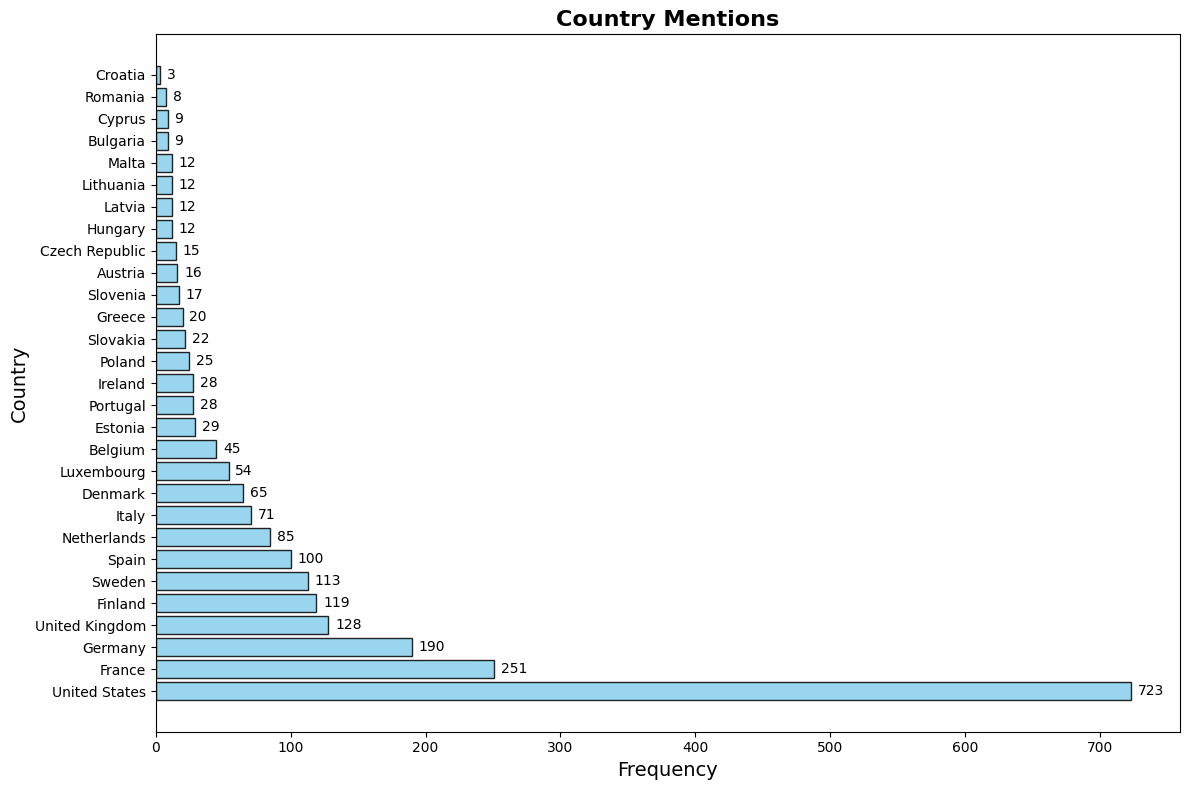

In [ ]:
import matplotlib.pyplot as plt

# Data
countries = result['Country']
frequencies = result['Frequency']

# Horizontal bar graph
plt.figure(figsize=(12, 8))
plt.barh(countries, frequencies, color='skyblue', edgecolor='black', alpha=0.85)

# Setting up a schedule
plt.title('Country Mentions', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()

# Adding frequency values
for index, value in enumerate(frequencies):
    plt.text(value + 5, index, str(value), fontsize=10, va='center')

# Showing a graph
plt.show()


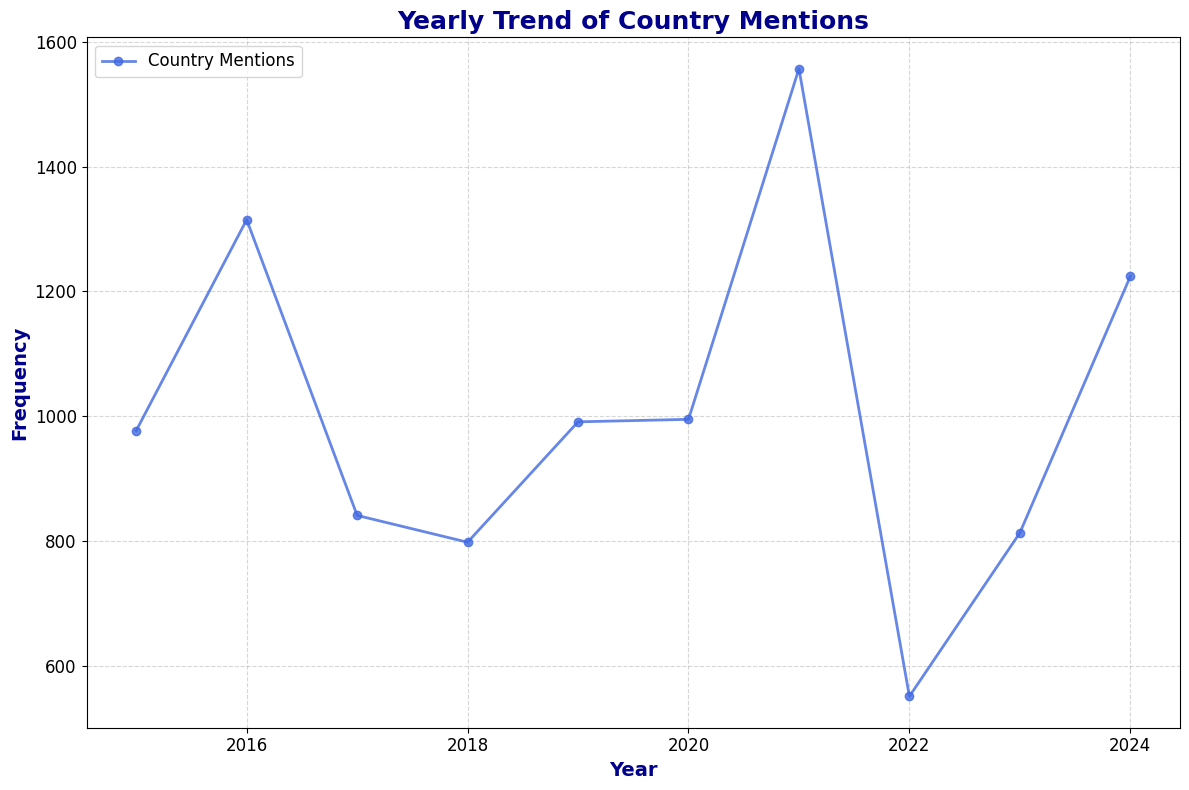

In [ ]:
import matplotlib.pyplot as plt

# Building a trend with improvements
plt.figure(figsize=(12, 8))
plt.plot(
    yearly_counts['Year'],
    yearly_counts['Frequency'],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='royalblue',
    alpha=0.8,
    label='Country Mentions'
)

#Adding headers and axes
plt.title('Yearly Trend of Country Mentions', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkblue')

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting up axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend
plt.legend(fontsize=12, loc='upper left')

# Improving the layout of the graph
plt.tight_layout()

# Showing a graph
plt.show()
